In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
from utils import check_paths
import pandas as pd
from scipy.io import loadmat
import joblib
%matplotlib qt

from pactools import Comodulogram, REFERENCES, raw_to_mask
from pactools import simulate_pac

In [2]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group_save_path = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set\\Y group'
sub_name = 'ALL_subs'
task = '_MAIN' # ['_BL', '_MAIN']
block_name = '_adaptation' # ['_baseline', '_adaptation']
task_stage = '_go' # '_plan' or '_go'
epochs_all_subs = mne.read_epochs(os.path.join(group_save_path, f"{sub_name}{task}_epochs{task_stage}{block_name}_ALL-epo.fif"), preload=True)
epochs_all_subs

Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y group\ALL_subs_MAIN_epochs_go_adaptation_ALL-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 16 columns
2835 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<EpochsFIF | 2835 events (all good), -0.5 – 0.7 s (baseline -0.5 – 0.7 s), ~793.0 MB, data loaded, with metadata,
 'go_on': 2835>

In [3]:
# Extract only EEG channel names from the Epochs object
eeg_channel_names = epochs_all_subs.copy().pick("eeg").ch_names
# print(eeg_channel_names)

# Select sensorimotor channels
choi = ['Fp1', 'Fp2', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'AF3', 'AF4', 'AF7', 'AF8',
        'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6']

epochs_all_subs.pick(choi)

<EpochsFIF | 2835 events (all good), -0.5 – 0.7 s (baseline -0.5 – 0.7 s), ~390.0 MB, data loaded, with metadata,
 'go_on': 2835>

In [4]:
sf = epochs_all_subs.info['sfreq']  # Sampling frequency
times = epochs_all_subs.times

In [4]:
theta_range = np.linspace(4, 8, 20)  # Phase: 4-8 Hz
gamma_range = np.linspace(30, 80, 20)  # Amplitude: 30-80 Hz

In [ ]:
# # set freqs for PAC analysis
# width, step = 3, .2
# theta = [3, 9]
# alpha = [6, 14]
# lower_gamma = (30, 50, 2, 0.5)
# higher_gamma = (50, 80, 2, 0.5)

In [6]:
%matplotlib inline
estimator = Comodulogram(
    fs=sf,
    low_fq_range=theta_range,  # Phase frequencies (theta)
    high_fq_range=gamma_range, # Amplitude frequencies (gamma)
    method='tort',
    progress_bar=True
    )


all_channels_data = epochs_all_subs.get_data()
out = np.empty(
    (len(theta_range), all_channels_data.shape[1], len(gamma_range))
)


for i in range(all_channels_data.shape[1]):
    data_flat = np.reshape(all_channels_data[:, i], -1)[None, :]
    pac = estimator.fit(
            data_flat,
            data_flat,
        )
    out[:, i] = pac.comod_
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # pac.plot(tight_layout=True, axs=[ax1])

    # ax2.imshow(
    #     out[:, i].T, origin='lower', aspect='auto',
    # )
    # plt.show()
    # break



[........................................] 100% | 6.52 sec | comodulogram: tort 
[........................................] 100% | 5.98 sec | comodulogram: tort 
[........................................] 100% | 6.33 sec | comodulogram: tort 
[........................................] 100% | 6.05 sec | comodulogram: tort 
[........................................] 100% | 6.33 sec | comodulogram: tort 
[........................................] 100% | 6.15 sec | comodulogram: tort 
[........................................] 100% | 6.31 sec | comodulogram: tort 
[........................................] 100% | 6.11 sec | comodulogram: tort 
[........................................] 100% | 6.43 sec | comodulogram: tort 
[........................................] 100% | 6.18 sec | comodulogram: tort 
[........................................] 100% | 6.43 sec | comodulogram: tort 
[........................................] 100% | 6.01 sec | comodulogram: tort 
[...........................

In [138]:
out[:, 1].min(), out[:, 1].max()

(np.float64(1.8501683643392669e-06), np.float64(2.0175959987021902e-05))

In [139]:
im = plt.imshow(out[:, 1])
plt.colorbar(im)

In [88]:
len(idxs)

30

In [106]:
epochs_all_subs.get_data().shape, len(epochs_all_subs.ch_names)

((933, 30, 601), 30)

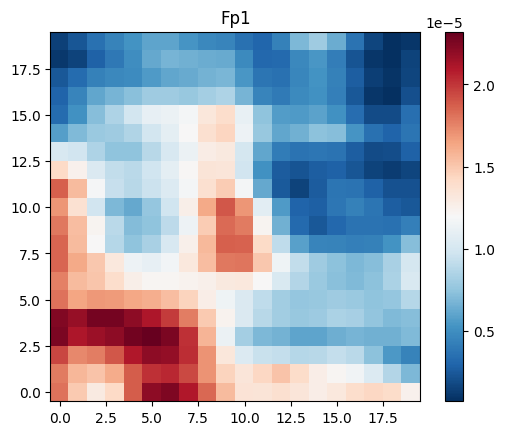

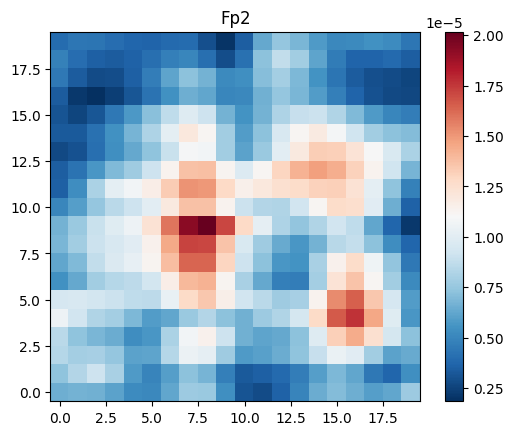

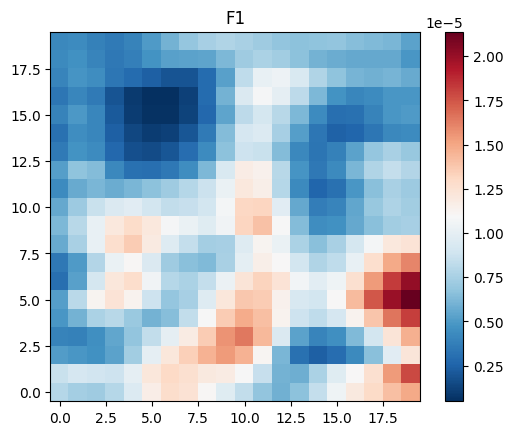

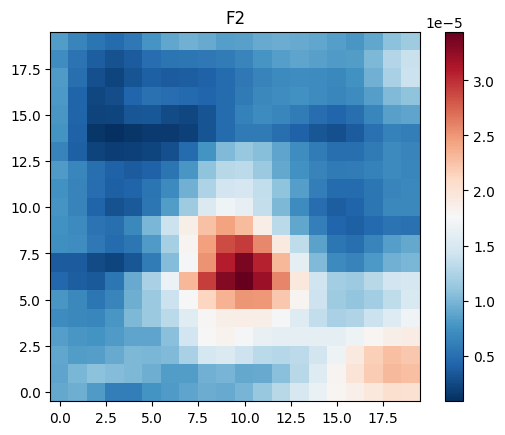

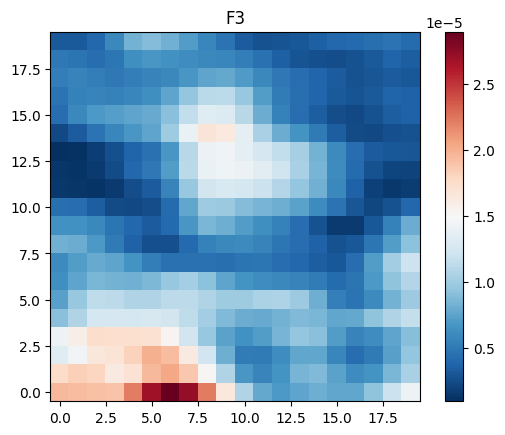

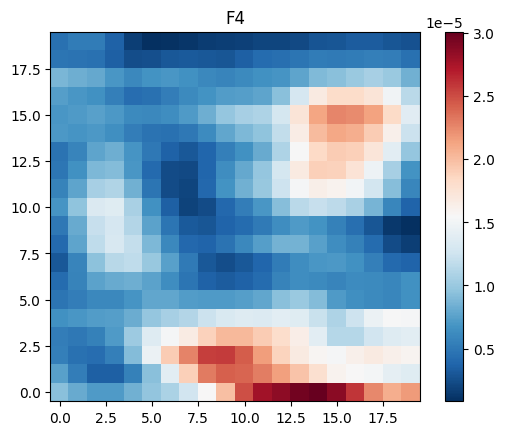

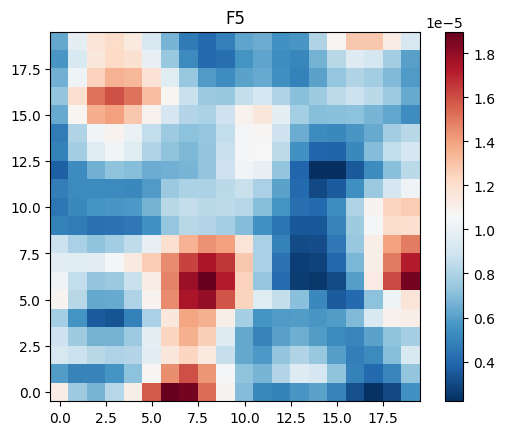

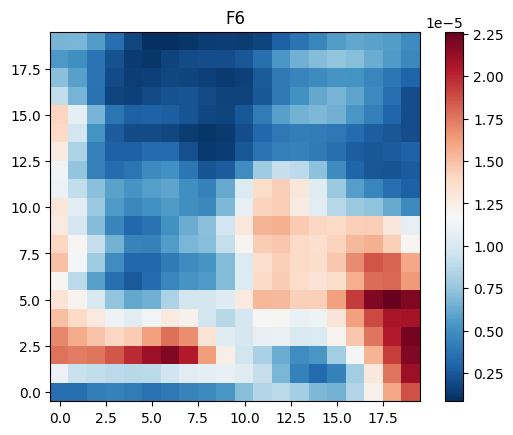

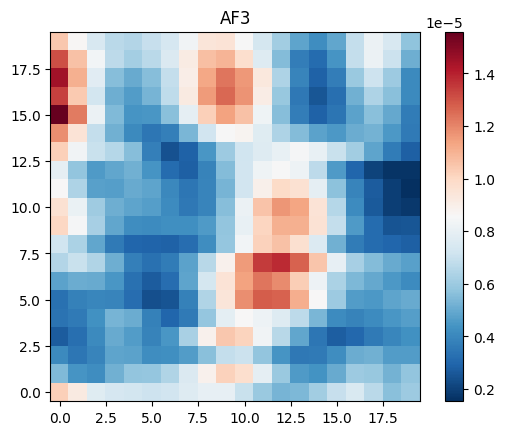

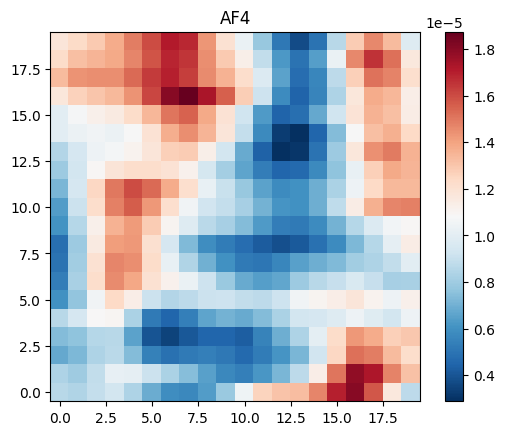

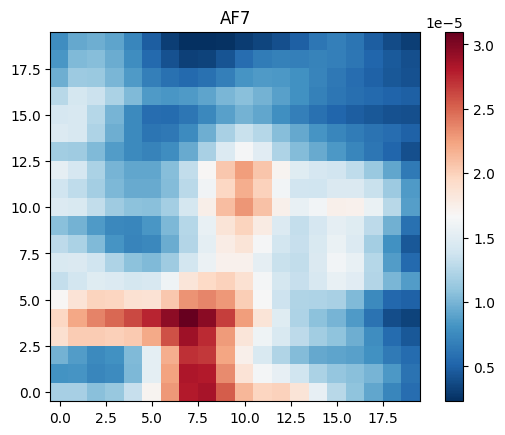

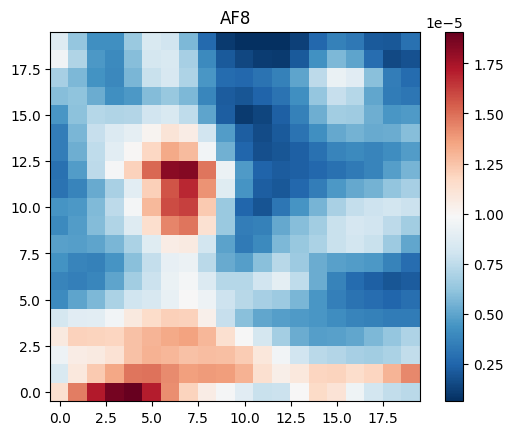

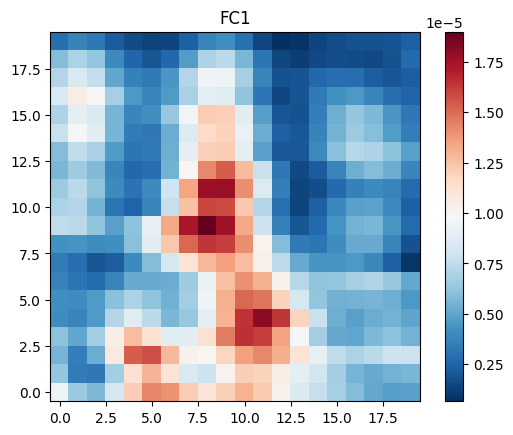

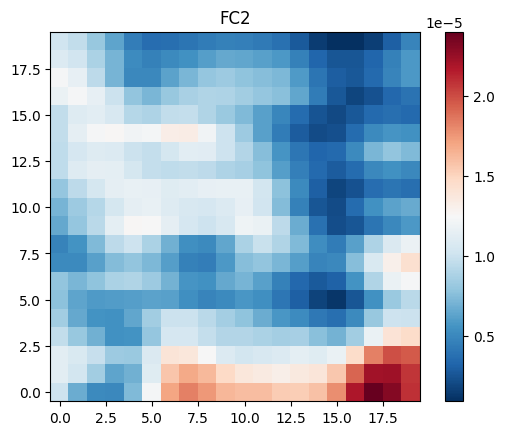

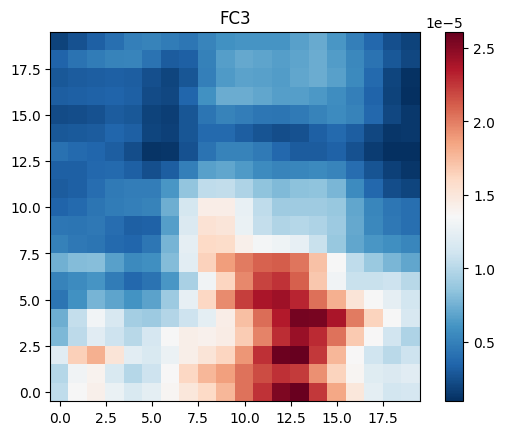

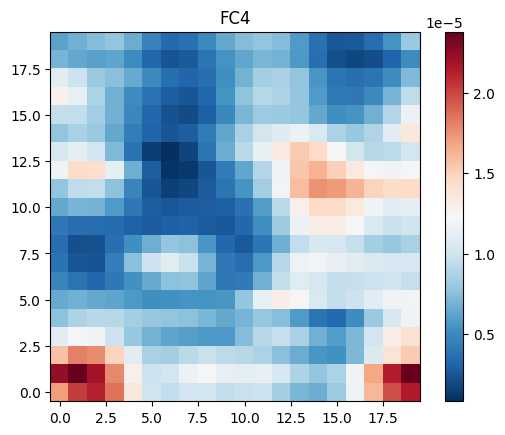

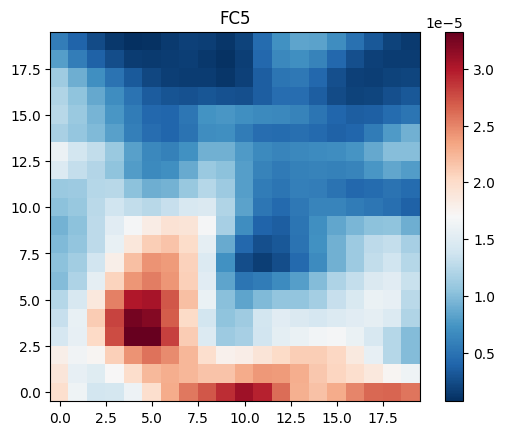

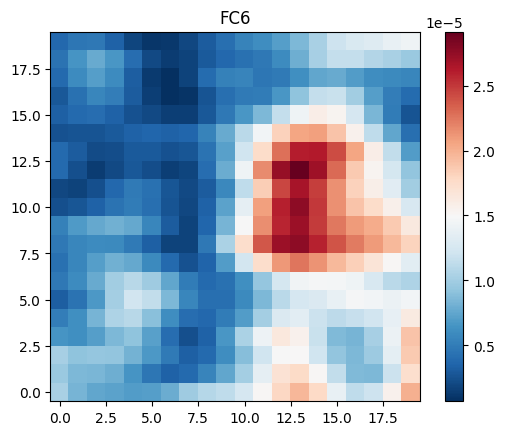

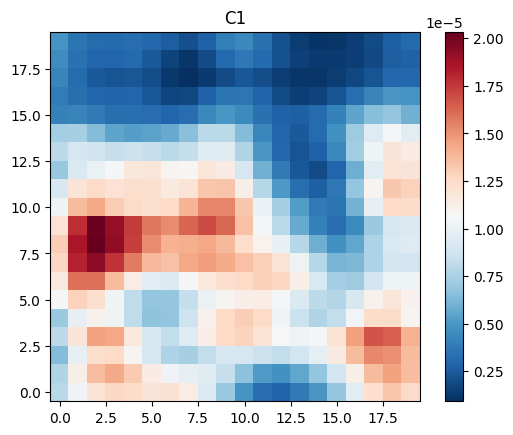

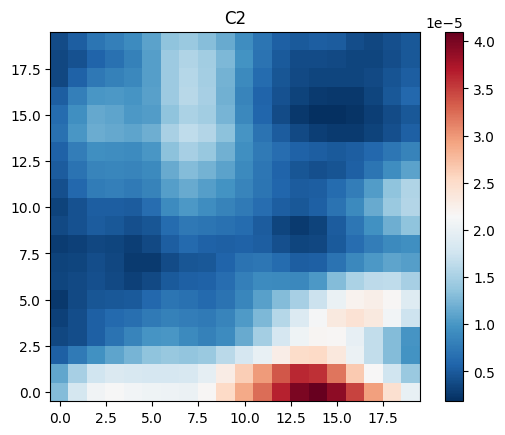

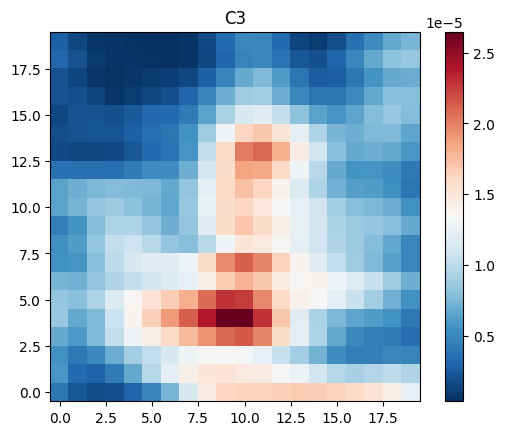

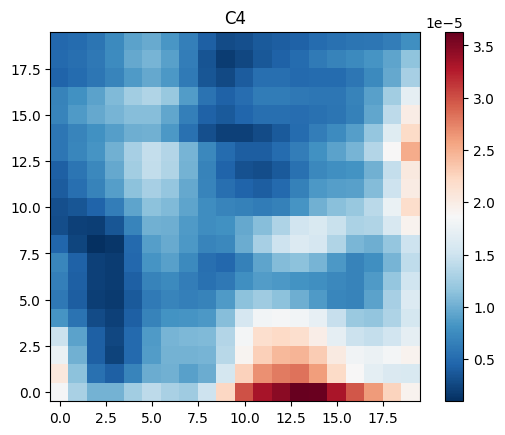

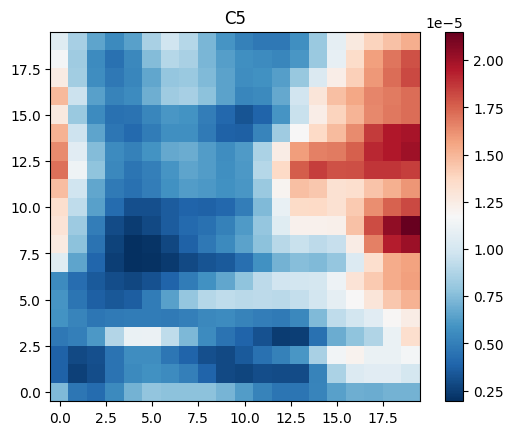

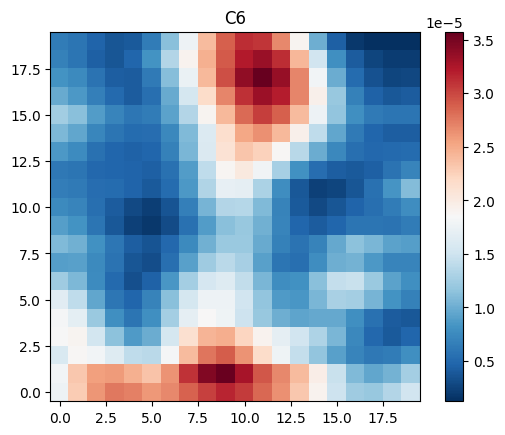

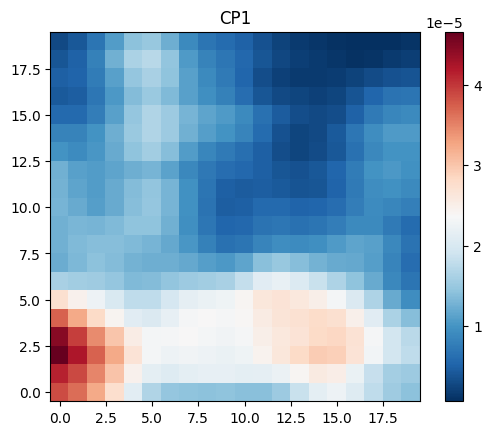

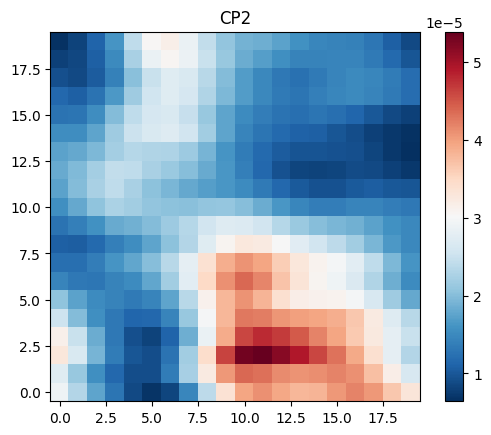

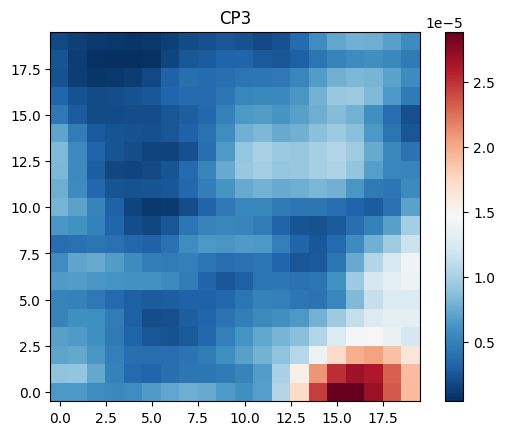

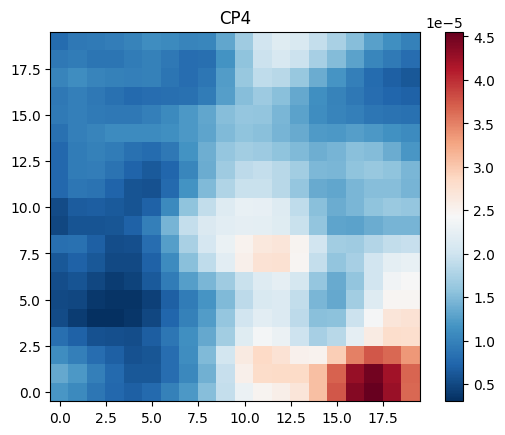

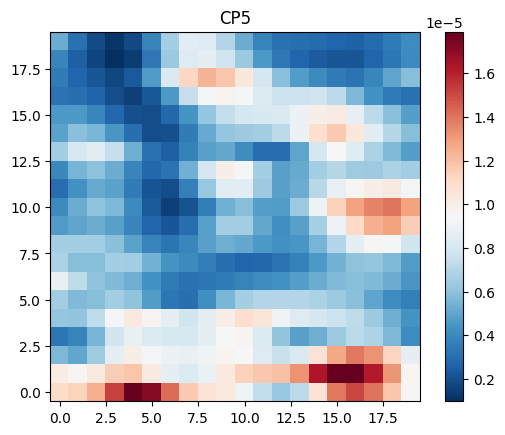

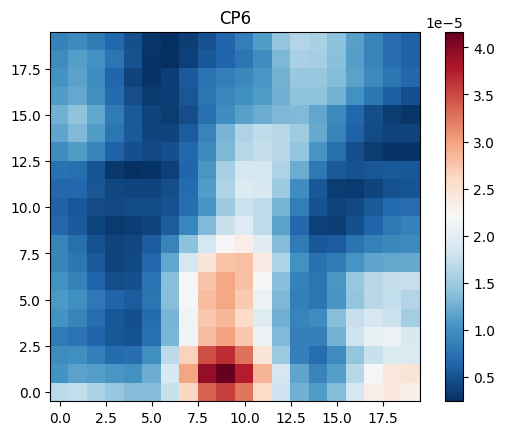

In [177]:
for i, ch_name in enumerate(epochs_all_subs.ch_names):
    im = plt.imshow(out[:, i], origin='lower', cmap='RdBu_r')
    plt.colorbar(im)
    plt.title(ch_name)
    plt.show()

In [71]:
theta_range.shape, gamma_range.shape

((20,), (20,))

In [68]:
pac.comod_.shape

(20, 20)

In [61]:
class A:
    def __init__(self):
        self._a = 1

    @property
    def a(self):
        return self._a
    
    # @a.setter
    # def a(self, value):
    #     self._a = value **2

a = A()


In [62]:
a._a = 2

a.a

2

In [63]:
a.a = 2

a.a

AttributeError: property 'a' of 'A' object has no setter

In [40]:
pac.comod_

In [37]:
epochs_all_subs.get_data(picks=chan).shape

(933, 1, 601)

In [22]:
for chan in choi:
    pac_save_path = 'D:\\BonoKat\\research project\\motor_pac\\pac_results'

    data = epochs_all_subs.get_data(picks=chan)[:,0,:]

    # create the instance of Comodulogram
    estimator = Comodulogram(fs=sf,
                            low_fq_range=theta_range,  # Phase frequencies (theta)
                            high_fq_range=gamma_range, # Amplitude frequencies (gamma)
                            method='tort',
                            progress_bar=True)

    # compute the comodulogram
    data_flat = np.reshape(data, -1)[None, :]
    pac = estimator.fit(
            data_flat,
            data_flat,
        )

    # Save estimator
    joblib.dump(pac, os.path.join(pac_save_path, f"pac_mi_group{task}{task_stage}{block_name}{chan}.pkl"))

    # Convert the plot to a Plotly figure (if supported)
    fig = pac.plot(tight_layout=False)
    # Add a title
    plt.title(f"PAC MI: {task}{task_stage}{block_name}_{chan}")

    # Save the plot
    plt.savefig(os.path.join(pac_save_path, f"pac_mi_group{task}{task_stage}{block_name}_{chan}.png"), dpi=300, bbox_inches="tight")
    plt.show()

[........................................] 100% | 5.99 sec | comodulogram: tort 
[........................................] 100% | 6.15 sec | comodulogram: tort 
[........................................] 100% | 6.43 sec | comodulogram: tort 
[........................................] 100% | 6.23 sec | comodulogram: tort 
[........................................] 100% | 5.95 sec | comodulogram: tort 
[........................................] 100% | 6.37 sec | comodulogram: tort 
[........................................] 100% | 5.91 sec | comodulogram: tort 
[........................................] 100% | 5.85 sec | comodulogram: tort 
[........................................] 100% | 5.97 sec | comodulogram: tort 
[........................................] 100% | 5.76 sec | comodulogram: tort 
[........................................] 100% | 5.77 sec | comodulogram: tort 
[........................................] 100% | 5.86 sec | comodulogram: tort 
[...........................

d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\pactools\comodulogram.py:442: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



[........................................] 100% | 5.76 sec | comodulogram: tort 
[........................................] 100% | 5.59 sec | comodulogram: tort 
[........................................] 100% | 5.80 sec | comodulogram: tort 
[........................................] 100% | 5.52 sec | comodulogram: tort 
[........................................] 100% | 5.61 sec | comodulogram: tort 
[........................................] 100% | 5.64 sec | comodulogram: tort 
[........................................] 100% | 5.69 sec | comodulogram: tort 
[........................................] 100% | 5.48 sec | comodulogram: tort 
[........................................] 100% | 5.72 sec | comodulogram: tort 


In [24]:
 epochs_all_subs.get_data(copy=False).shape

(933, 30, 601)

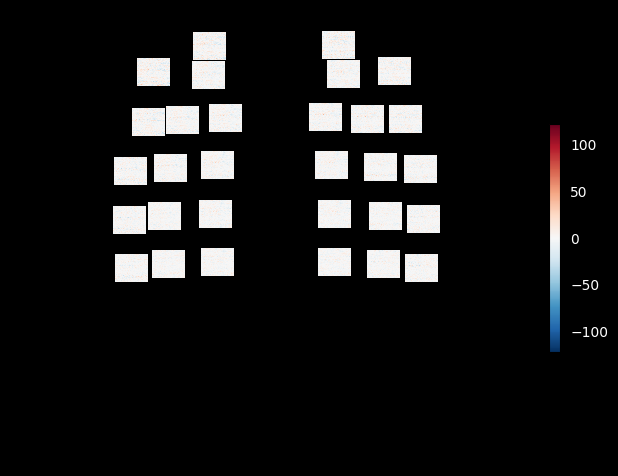

In [23]:
epochs_all_subs.plot_topo_image()

In [194]:
out.shape[1]

30

In [189]:
epochs.ch_names

['Fp1',
 'Fp2',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'AF3',
 'AF4',
 'AF7',
 'AF8',
 'FC1',
 'FC2',
 'FC3',
 'FC4',
 'FC5',
 'FC6',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'CP1',
 'CP2',
 'CP3',
 'CP4',
 'CP5',
 'CP6']

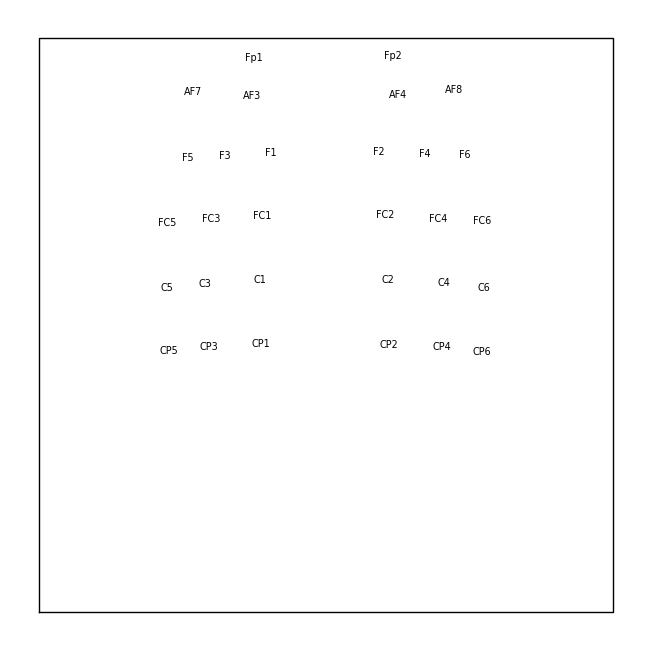

In [163]:
_ = mne.viz.plot_layout(find_layout(epochs.info))

In [75]:
type(layout)

mne.channels.layout.Layout

In [78]:
scalings

{'mag': 1000000000000000.0,
 'grad': 10000000000000.0,
 'eeg': 1000000.0,
 'eog': 1000000.0,
 'emg': 1000000.0,
 'ecg': 1000000.0,
 'misc': 1.0,
 'seeg': 1000.0,
 'dbs': 1000000.0,
 'ecog': 1000000.0,
 'dipole': 1000000000.0,
 'gof': 1.0,
 'bio': 1000000.0,
 'hbo': 1000000.0,
 'hbr': 1000000.0,
 'ref_meg': 1000000000000000.0,
 'fnirs_cw_amplitude': 1.0,
 'fnirs_fd_ac_amplitude': 1.0,
 'fnirs_fd_phase': 1.0,
 'fnirs_od': 1.0,
 'csd': 1000.0,
 'whitened': 1.0,
 'gsr': 1.0,
 'temperature': 1.0,
 'eyegaze': 1.0,
 'pupil': 1.0}

In [ ]:
epochs_all_subs.plot_topo_image

In [153]:
def _erfimage_imshow1(
    ax,
    ch_idx,
    tmin,
    tmax,
    vmin,
    vmax,
    ylim=None,
    data=None,
    epochs=None,
    sigma=None,
    order=None,
    scalings=None,
    vline=None,
    x_label=None,
    y_label=None,
    colorbar=False,
    cmap="RdBu_r",
    vlim_array=None,
):
    """Plot erfimage on sensor topography."""
    import matplotlib.pyplot as plt

    this_data = data[:, ch_idx, :]
    if vlim_array is not None:
        vmin, vmax = vlim_array[ch_idx]

    if callable(order):
        order = order(epochs.times, this_data)

    if order is not None:
        this_data = this_data[order]

    # if sigma > 0.0:
    #     this_data = ndimage.gaussian_filter1d(this_data, sigma=sigma, axis=0)
    img = ax.imshow(
        this_data,
        extent=[tmin, tmax, 0, len(data)],
        aspect="auto",
        origin="lower",
        vmin=0,
        vmax=0.75*data.max(),
        picker=True,
        cmap=cmap,
        interpolation="nearest",
    )

    ax = plt.gca()
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
    if colorbar:
        plt.colorbar(mappable=img)

In [154]:

from dataclasses import dataclass
from mne.channels.layout import find_layout
from functools import partial
from mne.defaults import _handle_default

from mne.viz.topo import _erfimage_imshow, _erfimage_imshow_unified, _plot_topo

from mne.viz.utils import (
    _setup_vmin_vmax,
    add_background_image,
    plt_show,
)

%matplotlib qt
epochs = epochs_all_subs
layout=None
sigma=0.0
vmin=None
vmax=None
colorbar=None
order=None
cmap="RdBu_r"
layout_scale=0.95
title=None
scalings=None
border="none"
fig_facecolor="white"
fig_background=None
font_color="k"
show=True


scalings = _handle_default("scalings", scalings)

# make a copy because we discard non-data channels and scale the data
epochs = epochs.copy().load_data()
# use layout to subset channels present in epochs object
if layout is None:
    layout = find_layout(epochs.info)
ch_names = set(layout.names) & set(epochs.ch_names)
idxs = [epochs.ch_names.index(ch_name) for ch_name in ch_names]
# epochs = epochs.pick(idxs)
# get lists of channel type & scale coefficient
ch_types = epochs.get_channel_types()
scale_coeffs = [scalings.get(ch_type, 1) for ch_type in ch_types]
# scale the data
epochs._data *= np.array(scale_coeffs)[:, np.newaxis]
data = np.transpose(out, (2, 1, 0))
# get vlims for each channel type
vlim_dict = dict()
for ch_type in set(ch_types):
    this_data = data[:, np.where(np.array(ch_types) == ch_type)]
    vlim_dict[ch_type] = _setup_vmin_vmax(this_data, vmin, vmax)
vlim_array = np.array([vlim_dict[ch_type] for ch_type in ch_types])
# only show colorbar if we have a single channel type
if colorbar is None:
    colorbar = len(set(ch_types)) == 1
# if colorbar=True, we know we have only 1 channel type so all entries
# in vlim_array are the same, just take the first one
if colorbar and vmin is None and vmax is None:
    vmin, vmax = vlim_array[0]

@dataclass
class a:
    events: list
    times: list

show_func = partial(
    _erfimage_imshow_unified,
    scalings=scale_coeffs,
    order=order,
    data=data,
    epochs=a([None], []),
    sigma=sigma,
    cmap=cmap,
    # vlim_array=vlim_array,
)


erf_imshow = partial(
    _erfimage_imshow1,
    vmin=None, vmax=None,
    scalings=scale_coeffs,
    order=order,
    data=data,
    epochs=a([None], []),
    sigma=sigma,
    cmap=cmap,
    vlim_array=None,#vlim_array,
    colorbar=True,
)

fig = _plot_topo(
    info=epochs.info,
    times=epochs.times,
    click_func=erf_imshow,
    show_func=show_func,
    layout=layout,
    colorbar=colorbar,
    vmin=0,
    vmax=5.38516883228592e-05,
    cmap=cmap,
    layout_scale=layout_scale,
    title=title,
    fig_facecolor=fig_facecolor,
    font_color=font_color,
    unified=True,
    img=True,
)
add_background_image(fig, fig_background)
# plt_show(show)
plt.show()

In [141]:
vmin, vmax

(np.float64(-5.38516883228592e-05), np.float64(5.38516883228592e-05))

In [111]:
vmin, vmax

(np.float64(-5.38516883228592e-05), np.float64(5.38516883228592e-05))

In [80]:
len(epochs.events)

933

In [88]:
layout

<Layout | EEG - Channels: Fp1, Fp2, F1 ...>

In [160]:
fig = _plot_topo(
    info=epochs.info,
    times=epochs.times,
    show_func=show_func,
    layout=layout,
    colorbar=colorbar,
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
    layout_scale=1,
    title=title,
    fig_facecolor=fig_facecolor,
    font_color=font_color,
    border=border,
    x_label="Time (s)",
    y_label="Epoch",
    unified=True,
    img=True,
)

plt.savefig(os.path.join(pac_save_path, f"pac_mi_group_TOPO{task}{task_stage}{block_name}.png"), dpi=300, bbox_inches="tight")
plt.show()

'Axes' object has no attribute 'pos'


Traceback (most recent call last):
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\matplotlib\cbook.py", line 298, in process
    func(*args, **kwargs)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 373, in _plot_topo_onpick
    show_func(ax, ch_idx)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 786, in _erfimage_imshow_unified
    _compute_ax_scalings(bn, (tmin, tmax), (0, len(epochs.events)))
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 389, in _compute_ax_scalings
    pos = bn.pos
          ^^^^^^
AttributeError: 'Axes' object has no attribute 'pos'


'Axes' object has no attribute 'pos'


Traceback (most recent call last):
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\matplotlib\cbook.py", line 298, in process
    func(*args, **kwargs)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 373, in _plot_topo_onpick
    show_func(ax, ch_idx)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 786, in _erfimage_imshow_unified
    _compute_ax_scalings(bn, (tmin, tmax), (0, len(epochs.events)))
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 389, in _compute_ax_scalings
    pos = bn.pos
          ^^^^^^
AttributeError: 'Axes' object has no attribute 'pos'


'Axes' object has no attribute 'pos'


Traceback (most recent call last):
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\matplotlib\cbook.py", line 298, in process
    func(*args, **kwargs)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 373, in _plot_topo_onpick
    show_func(ax, ch_idx)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 786, in _erfimage_imshow_unified
    _compute_ax_scalings(bn, (tmin, tmax), (0, len(epochs.events)))
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 389, in _compute_ax_scalings
    pos = bn.pos
          ^^^^^^
AttributeError: 'Axes' object has no attribute 'pos'


'Axes' object has no attribute 'pos'


Traceback (most recent call last):
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\matplotlib\cbook.py", line 298, in process
    func(*args, **kwargs)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 373, in _plot_topo_onpick
    show_func(ax, ch_idx)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 786, in _erfimage_imshow_unified
    _compute_ax_scalings(bn, (tmin, tmax), (0, len(epochs.events)))
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 389, in _compute_ax_scalings
    pos = bn.pos
          ^^^^^^
AttributeError: 'Axes' object has no attribute 'pos'


'Axes' object has no attribute 'pos'


Traceback (most recent call last):
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\matplotlib\cbook.py", line 298, in process
    func(*args, **kwargs)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 373, in _plot_topo_onpick
    show_func(ax, ch_idx)
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 786, in _erfimage_imshow_unified
    _compute_ax_scalings(bn, (tmin, tmax), (0, len(epochs.events)))
  File "d:\BonoKat\research project\motor_pac\venv\Lib\site-packages\mne\viz\topo.py", line 389, in _compute_ax_scalings
    pos = bn.pos
          ^^^^^^
AttributeError: 'Axes' object has no attribute 'pos'


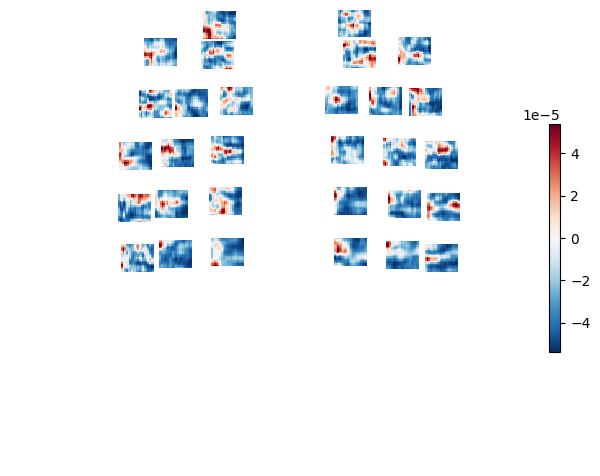

In [96]:
%matplotlib inline
fig = _plot_topo(
    info=epochs.info,
    times=[0, .000000001],
    show_func=show_func,
    layout=layout,
    colorbar=colorbar,
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
    layout_scale=1,
    title=title,
    fig_facecolor=fig_facecolor,
    font_color=font_color,
    border=border,
    x_label="Time (s)",
    y_label="Epoch",
    unified=True,
    img=True,
)

In [52]:
import numpy as np
%matplotlib qt
def cosine_similarity_matrix(A, B):
    # Flatten matrices to 1D vectors
    A_flat = A.flatten()
    B_flat = B.flatten()
    
    # Compute cosine similarity
    numerator = np.dot(A_flat, B_flat)
    denominator = np.linalg.norm(A_flat) * np.linalg.norm(B_flat)
    
    return numerator / denominator if denominator != 0 else 0

sim = np.empty((out.shape[1], out.shape[1]))
for i in range(out.shape[1]):
    for j in range(out.shape[1]):
        sim[i, j] = cosine_similarity_matrix(out[:, i], out[:, j])

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(8, 8, figure=fig)

# Create axes with custom positions
ax1 = fig.add_subplot(gs[:, :2])  # ax1 spans first 2 columns
ax2 = fig.add_subplot(gs[2:, 1:])  # ax2 spans last 2 columns


ax1.imshow(sim, cmap='RdBu_r')
ax1.set_xticks(np.arange(len(sim)))
ax1.set_yticks(np.arange(len(sim)))
ax1.set_xticklabels(
    epochs_all_subs.ch_names,
      rotation=45, ha="right",
      fontdict={'fontsize': 6}
    )  # Rotate for readability
ax1.set_yticklabels(epochs_all_subs.ch_names, fontdict={'fontsize': 8})

fig = _plot_topo(
    info=epochs.info,
    times=epochs.times,
    click_func=erf_imshow,
    show_func=show_func,
    layout=layout,
    colorbar=True,
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
    layout_scale=layout_scale,
    title=title,
    fig_facecolor=fig_facecolor,
    font_color=font_color,
    border=border,
    x_label="Time (s)",
    y_label="Epoch",
    unified=True,
    img=True,
    axes=ax2
)
add_background_image(fig, fig_background)
# fig.subplots_adjust(wspace=0.)
plt.show()

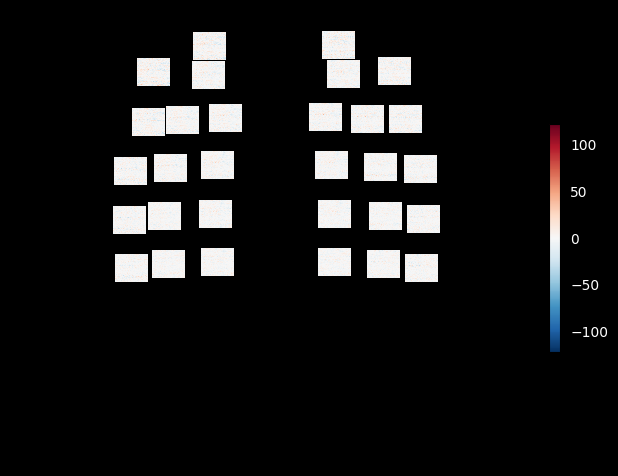

In [28]:
plot_topo_image_epochs(
    epochs_all_subs
)

In [7]:
# data = data.squeeze(axis=1)
# data.shape

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [ ]:
# from mne.filter import filter_data

# # Define frequency bands
# theta_band = (4, 8)  # Hz
# gamma_band = (30, 80)  # Hz

# # Get data for a specific channel (e.g., Cz)
# ch_name = 'C2'
# data = epochs_all_subs.get_data(picks=ch_name)  # Shape: (n_epochs, n_times)

# # Get the sampling frequency
# sfreq = epochs_all_subs.info["sfreq"]

# # Apply bandpass filtering for phase (theta)
# low_sig = filter_data(data, sfreq, theta_band[0], theta_band[1], method="fir")

# # Apply bandpass filtering for amplitude (gamma)
# high_sig = filter_data(data, sfreq, gamma_band[0], gamma_band[1], method="fir")

In [ ]:
# low_sig = low_sig.squeeze(axis=1)  # Shape: (734, 501)
# high_sig = high_sig.squeeze(axis=1)  # Shape: (734, 501)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [ ]:
# from pactools import simulate_pac, raw_to_mask, Comodulogram, MaskIterator

# mask = MaskIterator(epochs_all_subs.events, 0, .5, data.shape[-1], epochs_all_subs.info['sfreq'])

In [ ]:
# next(iter(mask)).shape

(1, 250)

In [ ]:
chan = 'C2'
# create the instance of Comodulogram
estimator = Comodulogram(fs=sf,
                        low_fq_range=theta_range,  # Phase frequencies (theta)
                        high_fq_range=gamma_range, # Amplitude frequencies (gamma)
                        method='tort',
                        progress_bar=True)

# compute the comodulogram
data_flat = np.reshape(data, -1)[None, :]
pac = estimator.fit(
        data_flat,
        data_flat,
    )

# Save estimator
joblib.dump(pac, f"pac_mi_{chan}.pkl")

# Convert the plot to a Plotly figure (if supported)
fig = pac.plot(tight_layout=False)
# Add a title
plt.title(f"PAC MI: {chan}")

# Save as an interactive HTML file
plt.savefig(f"pac_mi_{chan}.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
# Load and plot PAC file
pac1 = joblib.load(f"pac_mi_{chan}.pkl")
pac1.plot(tight_layout=False)


In [31]:
%matplotlib qt
# create the instance of Comodulogram
estimator = Comodulogram(fs=sf,
                        low_fq_range=theta_range,  # Phase frequencies (theta)
                        high_fq_range=gamma_range, # Amplitude frequencies (gamma)
                        method='tort',
                        progress_bar=True)
# compute the comodulogram
pac = estimator.fit(data, data)
# plot the results
estimator.plot(tight_layout=False)
plt.show()

[........................................] 100% | 3.93 sec | comodulogram: tort 


In [ ]:
%matplotlib qt
# create the instance of Comodulogram
estimator = Comodulogram(fs=sf,
                        low_fq_range=theta_range,  # Phase frequencies (theta)
                        high_fq_range=gamma_range, # Amplitude frequencies (gamma)
                        method='tort',
                        progress_bar=True)
# compute the comodulogram
pac = estimator.fit(np.reshape(data, -1)[None, :], np.reshape(data, -1)[None, :], mask=None)
# plot the results
estimator.plot(tight_layout=False)
plt.show()

[........................................] 100% | 2.23 sec | comodulogram: tort 


In [ ]:
pac = estimator.fit(data, data)
pac1 = estimator.fit(low_sig, high_sig)

In [23]:
pac == pac1

True

In [47]:
estimator.get_maximum_pac()

(array([7.57894737]), array([51.05263158]), array([2.77943771e-05]))

In [37]:
data[733].shape

(250,)

In [14]:
for chan in range(1): # range(len(choi))
    # Load the data from an MNE Epochs object (e.g., shape: epochs x channels x time)
    time_all = slice(250, 500) # 0s-0.5s
    data = epochs_all_subs.get_data()[:,chan,time_all]  # Shape: (n_epochs, n_channels, n_times)

    print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
        f"TIME VECTOR: n_times={len(times)}")
    
    

    for f_pha in [theta, alpha]: # [theta, alpha]
        print(f_pha)

        if f_pha == theta:
            phase_name = 'theta'
            amp_name = 'lower gamma'
            f_amp = lower_gamma
        else:
            phase_name = 'alpha'
            amp_name = 'higher gamma'
            f_amp = higher_gamma


DATA: (n_trials, n_times)=(933, 250); SAMPLING FREQUENCY=500.0Hz; TIME VECTOR: n_times=601


NameError: name 'theta' is not defined

In [3]:
fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 5.0  # Hz
low_fq_width = 1.0  # Hz

n_points = 10000
noise_level = 0.4

signal = simulate_pac(n_points=n_points, fs=fs, high_fq=high_fq, low_fq=low_fq,
                      low_fq_width=low_fq_width, noise_level=noise_level,
                      random_state=0)

In [6]:
signal

array([ 0.23248289,  0.71442597,  1.07336052, ...,  1.00246836,
       -0.15827975, -0.58094172])

In [ ]:
low_fq_range = np.linspace(3, 9, 25)
methods = ['canolty', 'tort', 'penny']

ozkurt... 
canolty... 
tort... 
penny... 
vanwijk... 
duprelatour... 
colgin... 


NotImplementedError: `interp2d` has been removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
https://scipy.github.io/devdocs/tutorial/interpolate/interp_transition_guide.html


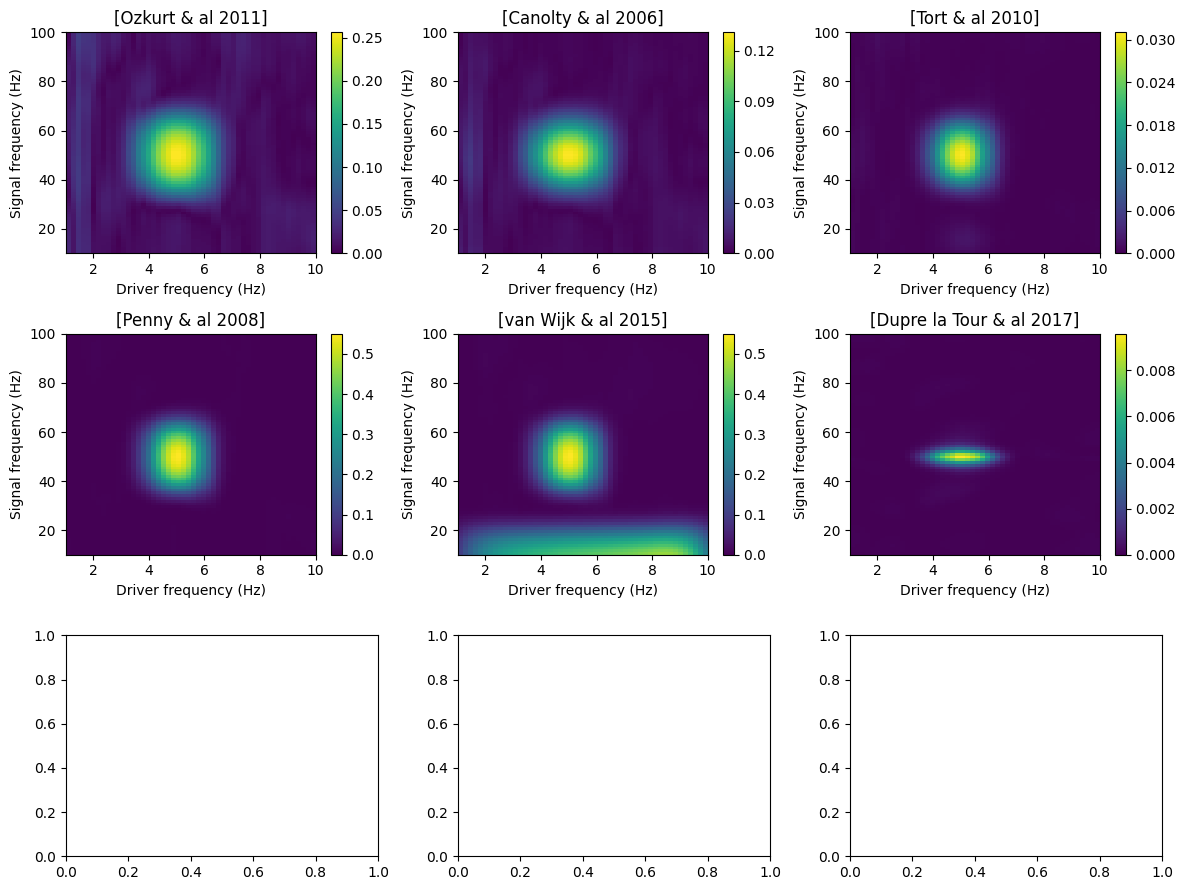

In [ ]:
# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
fig, axs = plt.subplots(
    n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
axs = axs.ravel()


# Compute the comodulograms and plot them
for ax, method in zip(axs, methods):
    print('%s... ' % (method, ))
    estimator = Comodulogram(fs=sf, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=method,
                             progress_bar=False)
    estimator.fit(signal)
    estimator.plot(titles=[REFERENCES[method]], axs=[ax])

plt.show()